In [ ]:
#to download data
import gdown
dataset_url = "https://drive.google.com/u/1/uc?id=1X7-HGxDHR54J60vdrwekaML-blIHQjBi&export=download"
filename = "train.csv"
gdown.download(dataset_url, filename)

Downloading...
From: https://drive.google.com/u/1/uc?id=1X7-HGxDHR54J60vdrwekaML-blIHQjBi&export=download
To: /content/train.csv
100%|██████████| 61.2k/61.2k [00:00<00:00, 4.74MB/s]


'train.csv'

In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [ ]:
df.shape

(891, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The dataset shows it has 891 rows of which age column contains 714 not null rows , cabin contains 204 not null rows and embarked contains 889 not null rows. which means remaining rows are missing

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isna().sum()/len(df)

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

* Age column contains 20% data missing
* Cabin column contains 77% data missing
* Embarked contains 0.2% data missing

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
# we want to predict if someone will survive or not. which means survived is target or label

In [ ]:
# rest are independent variables

# Exploratory Data Analaysis (EDA)

In [ ]:
# Survived column is categorical we plot barplot or pie chart

<Axes: xlabel='Survived', ylabel='count'>

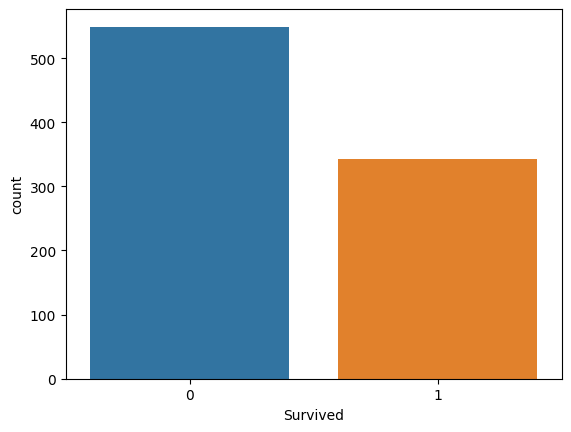

In [ ]:
import seaborn as sns
sns.countplot(x='Survived', data = df)

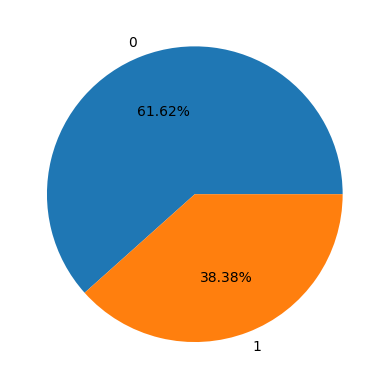

In [ ]:
s = df.Survived.value_counts()
import matplotlib.pyplot as plt
plt.pie(labels=s.index, x = s.values, autopct="%.2f%%")
plt.show()

The target variable Survived has Imbalanced class.

We can make it balanced using two techniques:
* Undersampling
* Oversampling
* Use SMOTE algorithms

We cannot use accuracy as evaluation metric if data is imbalanced.

<Axes: xlabel='Pclass', ylabel='count'>

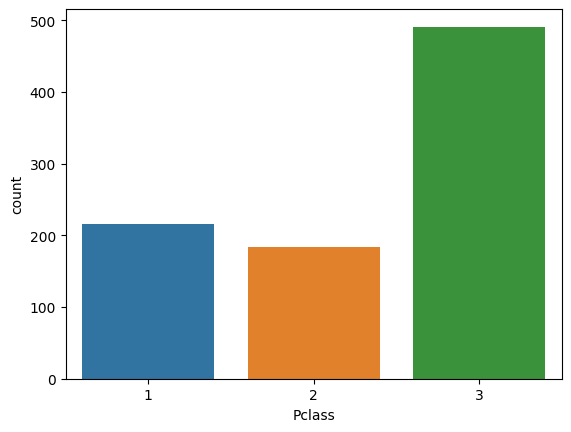

In [ ]:
sns.countplot(x='Pclass', data = df)

# Is there any relationship between Pclass and Survived?

<Axes: xlabel='Pclass', ylabel='count'>

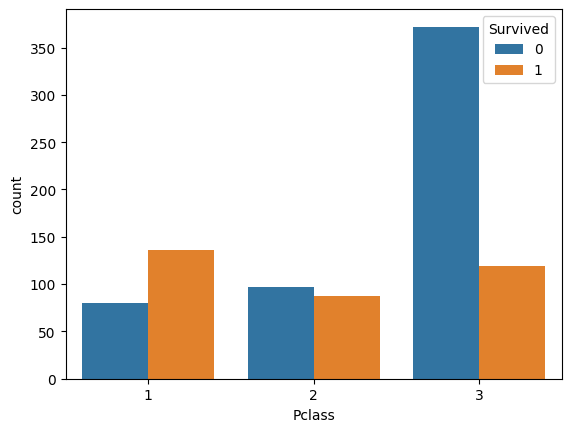

In [ ]:
sns.countplot(x='Pclass', hue = 'Survived', data = df)

Comparitively, most people survived in Pclass 1 and Most people died in Pclass 3. Which means Pclass has relationship with Survived.

# Is there any relationship between survived and sex column?

<Axes: xlabel='Sex', ylabel='count'>

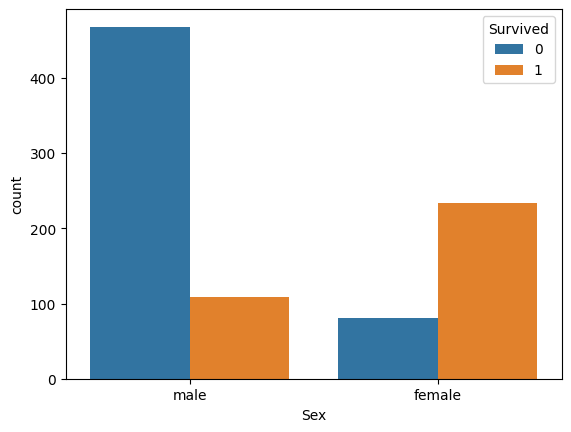

In [ ]:
sns.countplot(x='Sex', hue = 'Survived', data = df)

In this dataset most male died and most female survived. which means sex has relationship with survived.

# Is there any relationship between Age and Pclass?

<Axes: xlabel='Pclass', ylabel='Age'>

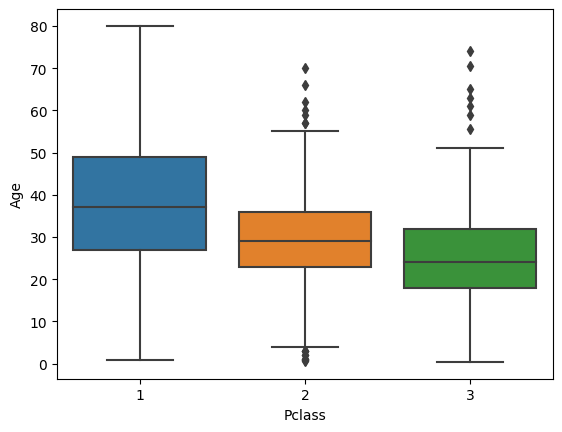

In [ ]:
sns.boxplot(x='Pclass', y = 'Age', data = df)

In [ ]:
df.groupby(['Pclass']).Age.median()

Pclass
1    37.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [ ]:
def fill_age(column):
    age = column[0]
    pclass = column[1]
    if pd.isnull(age) and pclass == 1:
        return 37
    elif pd.isnull(age) and pclass == 2:
        return 29
    elif pd.isnull(age) and pclass == 3:
        return 24
    else:
        return age

In [ ]:
df.Age = df[['Age', 'Pclass']].apply(fill_age, axis = 'columns')

In [ ]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
# the cabin column contain 77% missing data so we drop this column

In [ ]:
del df["Cabin"]

In [ ]:
df.isna().sum()

In [ ]:
# Embarked contains only 2 missing rows we can drop it.
df.dropna(subset=['Embarked'], inplace=True) # drop row that is missing on Embarked column

In [ ]:
df.head()

In [ ]:
# drop irrelevant feature
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace = True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [ ]:
X = df.iloc[:, 1:]
y = df.Survived

In [ ]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C


In [ ]:
X_encoded = pd.get_dummies(columns = ['Sex', 'Embarked'], data = X, drop_first=True)
X_encoded.head(3)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,0,1


In [ ]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=40)

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap='Blues')

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score

In [ ]:
precision_score(y_test, y_pred)

0.7391304347826086

In [ ]:
recall_score(y_test, y_pred)

0.75

In [ ]:
accuracy_score(y_test, y_pred)

0.8033707865168539

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84       110
           1       0.74      0.75      0.74        68

    accuracy                           0.80       178
   macro avg       0.79      0.79      0.79       178
weighted avg       0.80      0.80      0.80       178

